%matplotlib inline的作用是當你調用matplotlib.pyplot的繪圖函數plot()進行繪圖的時候，或者生成一個figure畫布的時候，可以直接在你的python console裏面生成圖像，如果你是在spyder的話就不用加這行。

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [11]:
dataset = pd.read_csv('data.csv')

print(dataset.keys())
print(dataset.columns)

Index(['Pretty Formula', 'Density', 'Band Gap'], dtype='object')
Index(['Pretty Formula', 'Density', 'Band Gap'], dtype='object')


In [12]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

print(X.shape, y.shape)
print(X[0:9])
print(y[0:9])

(501, 1) (501,)
[[0.81439573]
 [0.80753451]
 [0.81159897]
 [1.40926976]
 [1.33681125]
 [1.83476737]
 [1.72154091]
 [1.39438019]
 [1.45010264]]
[3.018  5.3418 3.6983 3.091  4.1598 4.1525 6.7187 3.7974 3.6284]


no numeric data to plot


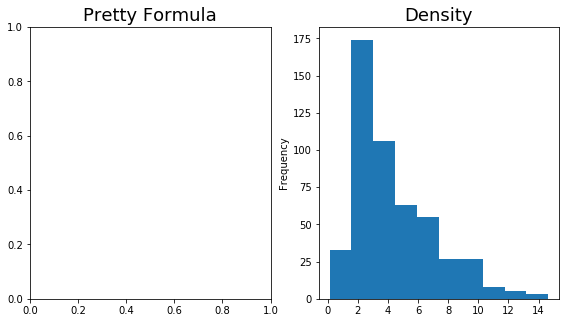

In [13]:
import math
import matplotlib.gridspec as gridspec

N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
feature=dataset[['Pretty Formula', 'Density']]
for item in feature.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

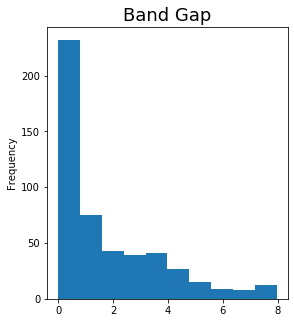

In [14]:
N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
target=dataset[['Band Gap']]
for item in target.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

# Splitting the dataset into the Training set and Test set
![holdout](https://cdn-images-1.medium.com/max/640/1*4G__SV580CxFj78o9yUXuQ.png)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, )
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Visualising the Regression results for higher and smoother curve

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [0.382198]


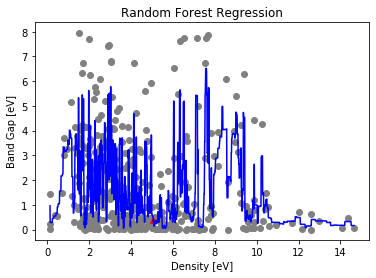

In [17]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
test = test.reshape(len(test), 1)
print("The caculated bandgap is: 1.8eV", )
y_pred=regressor.predict(test)
print("The predictive bandgap is: ",y_pred)
plt.scatter(test, y_pred, marker='^', color='red')
plt.show()

In [18]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(test)
print("The predictive bandgap is: ",y_pred)

The predictive bandgap is:  [1.63550898]


In [19]:
lasso = linear_model.Lasso()

In [20]:
rr = linear_model.Ridge()

In [21]:
from sklearn.neural_network import MLPRegressor
mlpr =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlpr.fit(X_train, y_train)
y_pred = mlpr.predict(test)
print("The predictive bandgap is: ",y_pred)

The predictive bandgap is:  [1.56621821]


In [31]:
%Lasso linear model
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)
y_pred =reg.predict(test)
print("The predictive bandgap is: ",y_pred)

The predictive bandgap is:  [1.64446495]


In [29]:
%BayesianRidge linear model
from sklearn import linear_model
reg_br = linear_model.BayesianRidge()
reg_br.fit(X_train, y_train)
y_pred =reg_br.predict(test)
print("The predictive bandgap is: ",y_pred)

The predictive bandgap is:  [1.65006209]
